In [61]:
# import library
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [41]:
train = pd.read_csv("titanic_train.csv")
print("Dataframe shape ", train.shape)
print(train.isnull().sum()) # notice 75% of cabin feature is null, so better to avoid

# clean the data
train = train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

Dataframe shape  (891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [42]:
# observe the mean values
train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [43]:
# function to impute age column
def age_approx(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age


In [44]:
# remove null values in the columns
train.dropna(inplace=True)

# impute age column
train["Age"] = train[["Age", "Pclass"]].apply(age_approx, axis=1)
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [45]:
# convert categorical variable
train = pd.get_dummies(train, columns=["Sex", "Embarked"])
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot: >

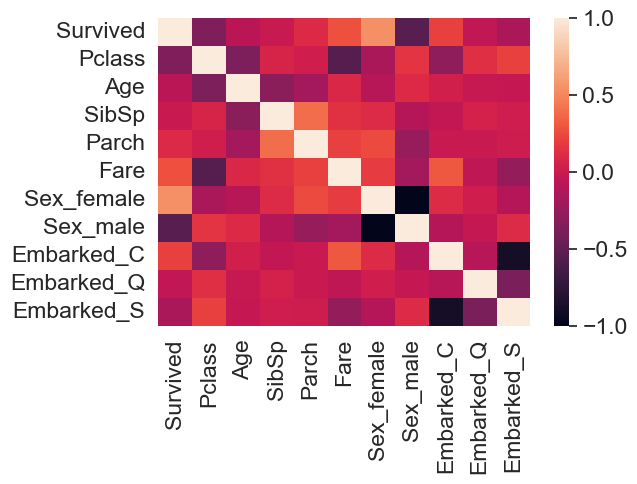

In [46]:
# check whether variables has any co-relation among themselves
plt.figure(figsize=(6,4))
sns.heatmap(train.corr())

In [63]:
# traing the model
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
x = train[used_features].values
y = train["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)

D:\install\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[102,  24],
       [ 22,  66]], dtype=int64)

In [66]:
print("Accuracy score - %s" % metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score - 0.7850467289719626
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       126
           1       0.73      0.75      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [67]:
print("Coefficient - ", lr.coef_)
print("Intercept - ", lr.intercept_)

Coefficient -  [[-1.18129332 -0.04546156 -0.35797914 -0.05400671  1.29125671 -1.28882367
   0.28111409 -0.34701426  0.06833321]]
Intercept -  [3.98026204]
